## 1º Change in top military spenders

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Carrega os dados da planilha militaryexpenditures.csv
milexp_df = pd.read_csv('./military_expenditure/militaryexpenditure.csv', sep=';')

# Exclui as regiões classificadas como "Regions Clubbed Economically" por serem muito generalistas
milexp_df = milexp_df[~milexp_df['Type'].isin(['Regions Clubbed Economically'])]

# Exclui as regiões "World", "North America" e "Middle income" por serem muito generalistas
milexp_df = milexp_df.loc[~milexp_df['Name'].isin(['World', 'North America', 'Middle income'])]

In [56]:
# Retorna o n-ésimo maior gastador militar em cada ano.
def n_maior_gastador(df, n):

    df['Rank'] = df.groupby('year')['Valor'].rank(method='dense', ascending=False)
    n_maior = df.loc[df['Rank'] == n]
    return n_maior

# 5 maiores gastadores militares 
first_spender = n_maior_gastador(milexp_df.copy(), 1)
second_spender = n_maior_gastador(milexp_df.copy(), 2)
third_spender = n_maior_gastador(milexp_df.copy(), 3)
fourth_spender = n_maior_gastador(milexp_df.copy(), 4)
fifth_spender = n_maior_gastador(milexp_df.copy(), 5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


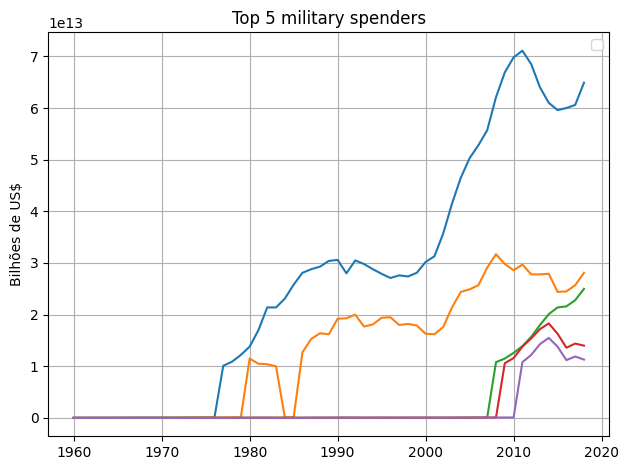

In [62]:
# Gráfico com os 5 maiores gastadores militares desde 1960

plt.plot(first_spender.sort_values(by=['year'])['year'], first_spender.sort_values(by=['year'])['Valor'])
plt.plot(second_spender.sort_values(by=['year'])['year'], second_spender.sort_values(by=['year'])['Valor'])
plt.plot(third_spender.sort_values(by=['year'])['year'], third_spender.sort_values(by=['year'])['Valor'])
plt.plot(fourth_spender.sort_values(by=['year'])['year'], fourth_spender.sort_values(by=['year'])['Valor'])
plt.plot(fifth_spender.sort_values(by=['year'])['year'], fifth_spender.sort_values(by=['year'])['Valor'])
plt.ylabel('Bilhões de US$')
plt.title('Top 5 military spenders')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()